In [1]:
from actor_critic_cts import Agent
import gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
agent = Agent(alpha=0.000005, beta=0.00001, input_dims=[3], gamma=0.99, n_actions=2, max_action=2)
env = gym.make('MountainCarContinuous-v0')
env = gym.make('Pendulum-v1', g=9.81)


score_history = []
num_episodes = 500

for i in range(num_episodes):
    score = 0
    done = False
    observation = env.reset()
    while not done:
        action = np.array(agent.choose_action(observation)).reshape((1,))
        observation_, reward, done, info = env.step(action)
        agent.learn(observation, reward, observation_, done)
        observation = observation_
        score += reward
    score_history.append(score)
    
    score_history.append(score)
    print('episode: ', i,'score: %.2f' % score)



episode:  0 score: -1624.85
episode:  1 score: -1465.82
episode:  2 score: -1071.63
episode:  3 score: -1817.09
episode:  4 score: -1499.28
episode:  5 score: -1687.18
episode:  6 score: -1372.82
episode:  7 score: -1035.83
episode:  8 score: -1432.40
episode:  9 score: -1598.30
episode:  10 score: -1041.85
episode:  11 score: -1447.64
episode:  12 score: -985.38
episode:  13 score: -1112.16
episode:  14 score: -958.96
episode:  15 score: -1344.21
episode:  16 score: -1076.00
episode:  17 score: -930.25
episode:  18 score: -1214.34
episode:  19 score: -1065.91
episode:  20 score: -886.95
episode:  21 score: -976.89
episode:  22 score: -925.56
episode:  23 score: -949.82
episode:  24 score: -1072.82
episode:  25 score: -1238.67
episode:  26 score: -1197.43
episode:  27 score: -1049.38
episode:  28 score: -1437.50
episode:  29 score: -1035.14
episode:  30 score: -1152.03
episode:  31 score: -999.25
episode:  32 score: -1408.49
episode:  33 score: -1102.81
episode:  34 score: -1065.56
epi

Text(0.5, 1.0, 'Running average of previous 100 episodes')

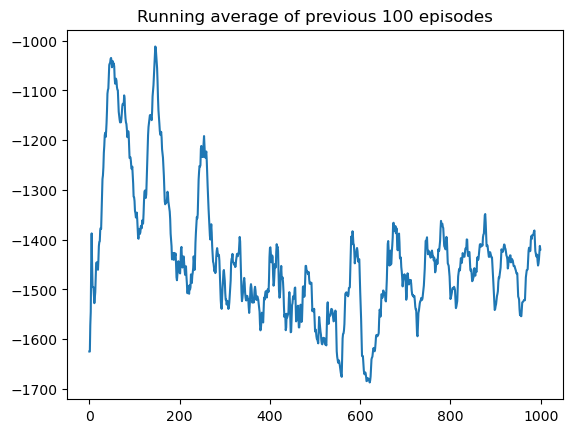

In [3]:
running_avg = np.zeros(len(score_history))
for i in range(len(running_avg)):
    running_avg[i] = np.mean(score_history[max(0, i-20):(i+1)])
plt.plot(range(len(score_history)), running_avg)
plt.title('Running average of previous 100 episodes')